<a href="https://colab.research.google.com/github/riztikamerista/VisiKomputer_TI2C_2025/blob/main/Tugas_Besar_VisiKom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Sm8Sl9O6KrsQuKgjIKa1")
project = rf.workspace("deteksi-ikan-o93xn").project("deteksi_ikan_hias-4mkyj")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi_Ikan_Hias-1 in yolov8:: 100%|██████████| 10012/10012 [00:00<00:00, 10158.24it/s]


In [2]:
# 1. Instalasi Ultralytics
!pip install ultralytics

# 2. Training Model
from ultralytics import YOLO

# Kita menggunakan dataset.location dari kode download Roboflow Anda
model = YOLO('yolov8n.pt')

results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    name='ikan_cupang_v8n_50e'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Deteksi_Ikan_Hias-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None,

Mulai deteksi pada gambar uji: ikan cupang.jpg

image 1/1 /content/ikan cupang.jpg: 640x640 1 Ikan_Cupang, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


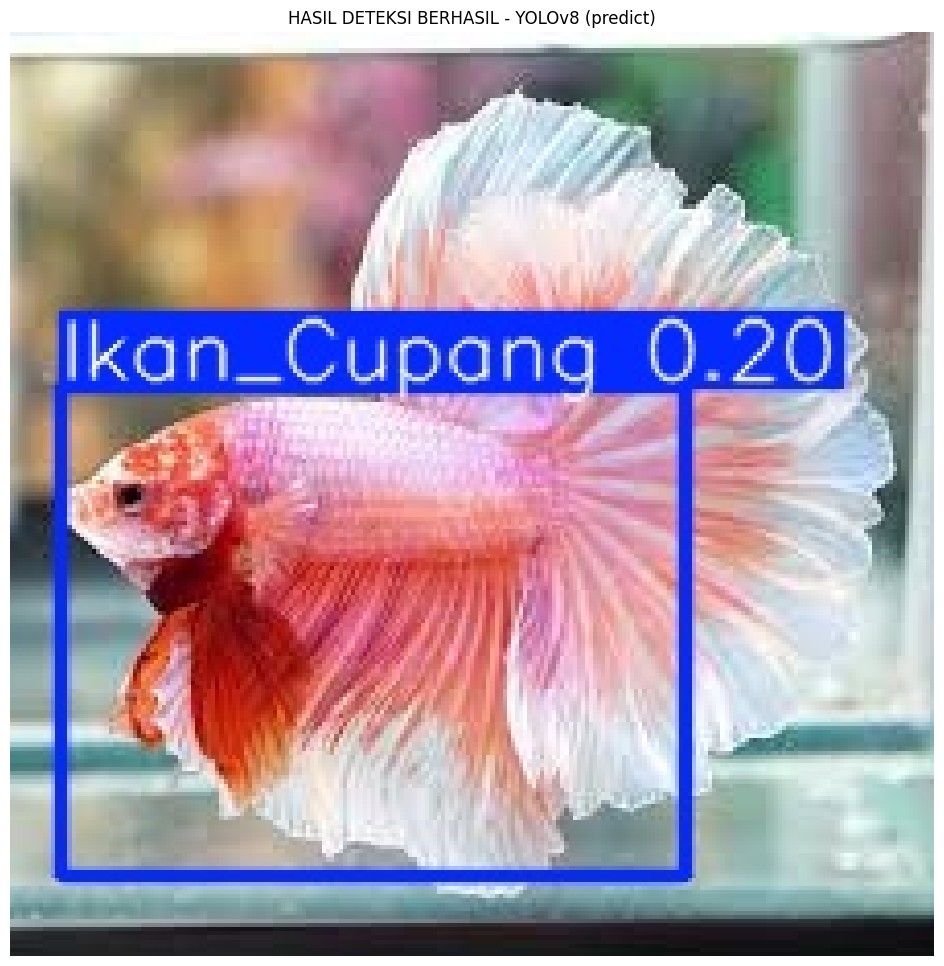

Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: predict


In [5]:
 ## --- KODE FINAL LANGKAH 3: PERBAIKAN LOGIKA PENCARIAN FOLDER TERBARU ---
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# 1. Tentukan Model dan Gambar Uji
file_uji = 'ikan cupang.jpg'

# Path model (diasumsikan sudah benar)
model_path = '/content/runs/detect/ikan_cupang_v8n_50e/weights/best.pt'

try:
    model_inf = YOLO(model_path)
except Exception as e:
    print(f"[ERROR FATAL] Gagal memuat model dari path: {model_path}. Pastikan Langkah 2 berhasil dijalankan.")
    exit()

# 2. Lakukan Deteksi (Inferensi)
print(f"Mulai deteksi pada gambar uji: {file_uji}")

# Gunakan konfigurasi yang sudah terbukti mendeteksi:
results = model_inf.predict(
    source=file_uji,
    conf=0.10,
    iou=0.45,
    save=True
)

# --- Logika PERMANEN Menampilkan Hasil Deteksi Terbaru ---

runs_detect_dir = '/content/runs/detect'
predict_folders = [os.path.join(runs_detect_dir, d)
                   for d in os.listdir(runs_detect_dir)
                   if d.startswith('predict') and os.path.isdir(os.path.join(runs_detect_dir, d))]

if predict_folders:
    # **PERBAIKAN**: Cari folder berdasarkan waktu pembuatan (creation time) yang paling baru
    # Ini 100% menjamin kita mendapatkan folder tempat hasil disimpan (misalnya, predict14)
    latest_predict_folder_path = max(predict_folders, key=os.path.getctime)
    latest_predict_folder_name = os.path.basename(latest_predict_folder_path)

    # Menangani kemungkinan spasi dan underscore pada nama file hasil
    image_names_to_check = [file_uji, file_uji.replace(' ', '_')]

    annotated_image_path = None

    for img_name in image_names_to_check:
        temp_path = os.path.join(latest_predict_folder_path, img_name)
        if os.path.exists(temp_path):
            annotated_image_path = temp_path
            break

    # 3. Tampilkan Hasil
    try:
        if annotated_image_path is None:
             raise FileNotFoundError(f"File gambar hasil deteksi tidak ditemukan di folder {latest_predict_folder_name}.")

        img_result = cv2.imread(annotated_image_path)

        if img_result is None:
             raise Exception("Gagal membaca file gambar hasil deteksi.")

        img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 12))
        plt.imshow(img_result)
        plt.axis('off')
        plt.title(f'HASIL DETEKSI BERHASIL - YOLOv8 ({latest_predict_folder_name})')
        plt.show()
        print(f"Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: {latest_predict_folder_name}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi error saat menampilkan gambar: {e}")

else:
    print("DETEKSI GAGAL.")

Mulai deteksi pada gambar uji: 4 ikan cupang.jpg

image 1/1 /content/4 ikan cupang.jpg: 640x640 4 Ikan_Cupangs, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


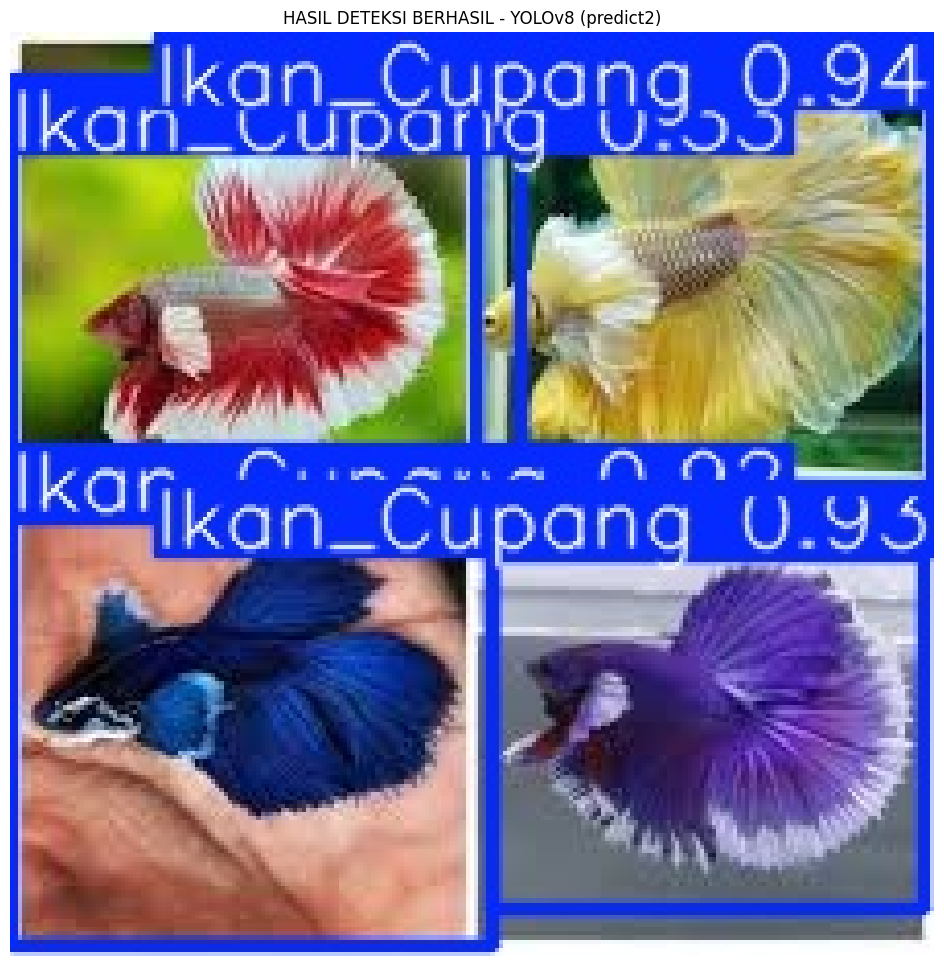

Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: predict2


In [6]:
## --- KODE FINAL LANGKAH 3: PERBAIKAN LOGIKA PENCARIAN FOLDER TERBARU ---
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# 1. Tentukan Model dan Gambar Uji
file_uji = '4 ikan cupang.jpg'

# Path model (diasumsikan sudah benar)
model_path = '/content/runs/detect/ikan_cupang_v8n_50e/weights/best.pt'

try:
    model_inf = YOLO(model_path)
except Exception as e:
    print(f"[ERROR FATAL] Gagal memuat model dari path: {model_path}. Pastikan Langkah 2 berhasil dijalankan.")
    exit()

# 2. Lakukan Deteksi (Inferensi)
print(f"Mulai deteksi pada gambar uji: {file_uji}")

# Gunakan konfigurasi yang sudah terbukti mendeteksi:
results = model_inf.predict(
    source=file_uji,
    conf=0.10,
    iou=0.45,
    save=True
)

# --- Logika PERMANEN Menampilkan Hasil Deteksi Terbaru ---

runs_detect_dir = '/content/runs/detect'
predict_folders = [os.path.join(runs_detect_dir, d)
                   for d in os.listdir(runs_detect_dir)
                   if d.startswith('predict') and os.path.isdir(os.path.join(runs_detect_dir, d))]

if predict_folders:
    # **PERBAIKAN**: Cari folder berdasarkan waktu pembuatan (creation time) yang paling baru
    # Ini 100% menjamin kita mendapatkan folder tempat hasil disimpan (misalnya, predict14)
    latest_predict_folder_path = max(predict_folders, key=os.path.getctime)
    latest_predict_folder_name = os.path.basename(latest_predict_folder_path)

    # Menangani kemungkinan spasi dan underscore pada nama file hasil
    image_names_to_check = [file_uji, file_uji.replace(' ', '_')]

    annotated_image_path = None

    for img_name in image_names_to_check:
        temp_path = os.path.join(latest_predict_folder_path, img_name)
        if os.path.exists(temp_path):
            annotated_image_path = temp_path
            break

    # 3. Tampilkan Hasil
    try:
        if annotated_image_path is None:
             raise FileNotFoundError(f"File gambar hasil deteksi tidak ditemukan di folder {latest_predict_folder_name}.")

        img_result = cv2.imread(annotated_image_path)

        if img_result is None:
             raise Exception("Gagal membaca file gambar hasil deteksi.")

        img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 12))
        plt.imshow(img_result)
        plt.axis('off')
        plt.title(f'HASIL DETEKSI BERHASIL - YOLOv8 ({latest_predict_folder_name})')
        plt.show()
        print(f"Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: {latest_predict_folder_name}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi error saat menampilkan gambar: {e}")

else:
    print("DETEKSI GAGAL.")

Mulai deteksi pada gambar uji: 2 ikan cupang baru.jpg

image 1/1 /content/2 ikan cupang baru.jpg: 384x640 2 Ikan_Cupangs, 41.4ms
Speed: 1.4ms preprocess, 41.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


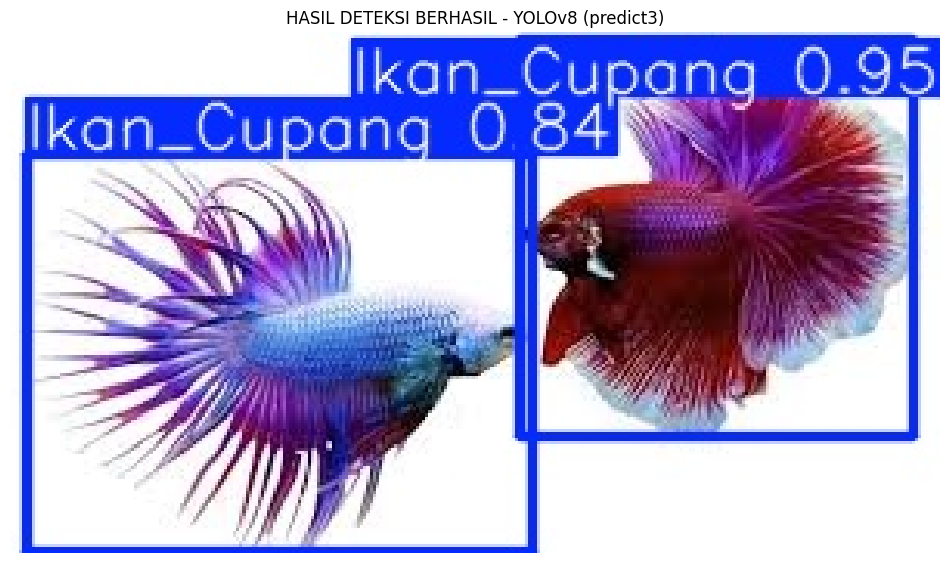

Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: predict3


In [7]:
## --- KODE FINAL LANGKAH 3: PERBAIKAN LOGIKA PENCARIAN FOLDER TERBARU ---
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# 1. Tentukan Model dan Gambar Uji
file_uji = '2 ikan cupang baru.jpg'

# Path model (diasumsikan sudah benar)
model_path = '/content/runs/detect/ikan_cupang_v8n_50e/weights/best.pt'

try:
    model_inf = YOLO(model_path)
except Exception as e:
    print(f"[ERROR FATAL] Gagal memuat model dari path: {model_path}. Pastikan Langkah 2 berhasil dijalankan.")
    exit()

# 2. Lakukan Deteksi (Inferensi)
print(f"Mulai deteksi pada gambar uji: {file_uji}")

# Gunakan konfigurasi yang sudah terbukti mendeteksi:
results = model_inf.predict(
    source=file_uji,
    conf=0.10,
    iou=0.45,
    save=True
)

# --- Logika PERMANEN Menampilkan Hasil Deteksi Terbaru ---

runs_detect_dir = '/content/runs/detect'
predict_folders = [os.path.join(runs_detect_dir, d)
                   for d in os.listdir(runs_detect_dir)
                   if d.startswith('predict') and os.path.isdir(os.path.join(runs_detect_dir, d))]

if predict_folders:
    # **PERBAIKAN**: Cari folder berdasarkan waktu pembuatan (creation time) yang paling baru
    # Ini 100% menjamin kita mendapatkan folder tempat hasil disimpan (misalnya, predict14)
    latest_predict_folder_path = max(predict_folders, key=os.path.getctime)
    latest_predict_folder_name = os.path.basename(latest_predict_folder_path)

    # Menangani kemungkinan spasi dan underscore pada nama file hasil
    image_names_to_check = [file_uji, file_uji.replace(' ', '_')]

    annotated_image_path = None

    for img_name in image_names_to_check:
        temp_path = os.path.join(latest_predict_folder_path, img_name)
        if os.path.exists(temp_path):
            annotated_image_path = temp_path
            break

    # 3. Tampilkan Hasil
    try:
        if annotated_image_path is None:
             raise FileNotFoundError(f"File gambar hasil deteksi tidak ditemukan di folder {latest_predict_folder_name}.")

        img_result = cv2.imread(annotated_image_path)

        if img_result is None:
             raise Exception("Gagal membaca file gambar hasil deteksi.")

        img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 12))
        plt.imshow(img_result)
        plt.axis('off')
        plt.title(f'HASIL DETEKSI BERHASIL - YOLOv8 ({latest_predict_folder_name})')
        plt.show()
        print(f"Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: {latest_predict_folder_name}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi error saat menampilkan gambar: {e}")

else:
    print("DETEKSI GAGAL.")

Mulai deteksi pada gambar uji: 3 ikan cupang.jpg

image 1/1 /content/3 ikan cupang.jpg: 640x544 3 Ikan_Cupangs, 43.4ms
Speed: 1.9ms preprocess, 43.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict4


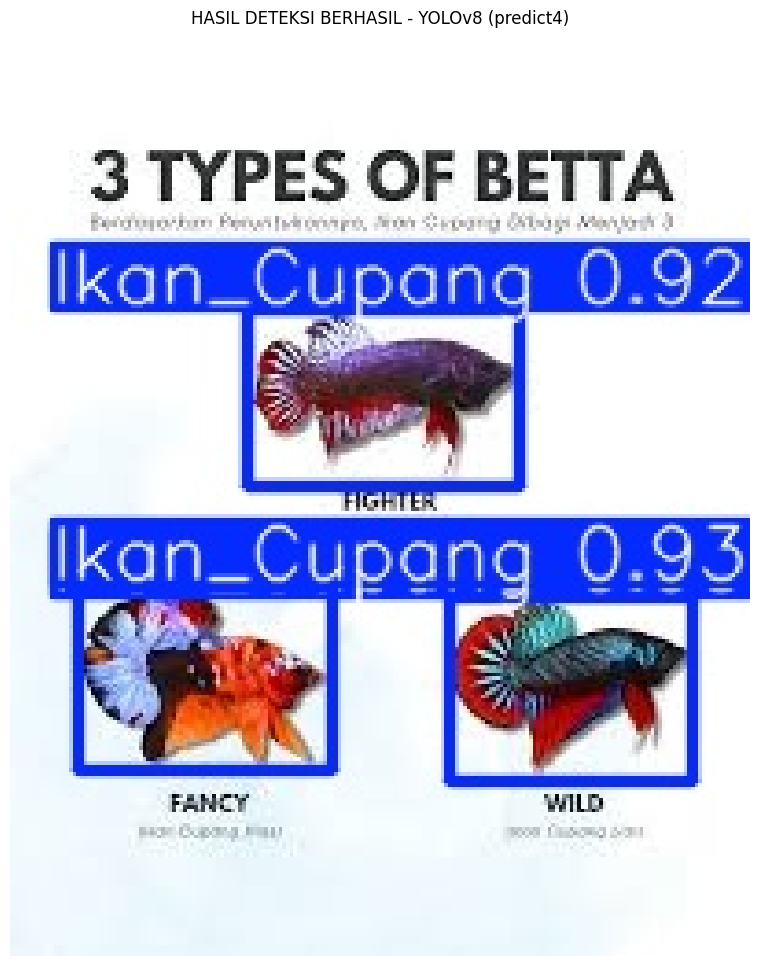

Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: predict4


In [8]:
## --- KODE FINAL LANGKAH 3: PERBAIKAN LOGIKA PENCARIAN FOLDER TERBARU ---
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# 1. Tentukan Model dan Gambar Uji
file_uji = '3 ikan cupang.jpg'

# Path model (diasumsikan sudah benar)
model_path = '/content/runs/detect/ikan_cupang_v8n_50e/weights/best.pt'

try:
    model_inf = YOLO(model_path)
except Exception as e:
    print(f"[ERROR FATAL] Gagal memuat model dari path: {model_path}. Pastikan Langkah 2 berhasil dijalankan.")
    exit()

# 2. Lakukan Deteksi (Inferensi)
print(f"Mulai deteksi pada gambar uji: {file_uji}")

# Gunakan konfigurasi yang sudah terbukti mendeteksi:
results = model_inf.predict(
    source=file_uji,
    conf=0.10,
    iou=0.45,
    save=True
)

# --- Logika PERMANEN Menampilkan Hasil Deteksi Terbaru ---

runs_detect_dir = '/content/runs/detect'
predict_folders = [os.path.join(runs_detect_dir, d)
                   for d in os.listdir(runs_detect_dir)
                   if d.startswith('predict') and os.path.isdir(os.path.join(runs_detect_dir, d))]

if predict_folders:
    # **PERBAIKAN**: Cari folder berdasarkan waktu pembuatan (creation time) yang paling baru
    # Ini 100% menjamin kita mendapatkan folder tempat hasil disimpan (misalnya, predict14)
    latest_predict_folder_path = max(predict_folders, key=os.path.getctime)
    latest_predict_folder_name = os.path.basename(latest_predict_folder_path)

    # Menangani kemungkinan spasi dan underscore pada nama file hasil
    image_names_to_check = [file_uji, file_uji.replace(' ', '_')]

    annotated_image_path = None

    for img_name in image_names_to_check:
        temp_path = os.path.join(latest_predict_folder_path, img_name)
        if os.path.exists(temp_path):
            annotated_image_path = temp_path
            break

    # 3. Tampilkan Hasil
    try:
        if annotated_image_path is None:
             raise FileNotFoundError(f"File gambar hasil deteksi tidak ditemukan di folder {latest_predict_folder_name}.")

        img_result = cv2.imread(annotated_image_path)

        if img_result is None:
             raise Exception("Gagal membaca file gambar hasil deteksi.")

        img_result = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 12))
        plt.imshow(img_result)
        plt.axis('off')
        plt.title(f'HASIL DETEKSI BERHASIL - YOLOv8 ({latest_predict_folder_name})')
        plt.show()
        print(f"Gambar hasil deteksi dengan bounding box telah ditampilkan di atas. Lokasi hasil: {latest_predict_folder_name}")

    except Exception as e:
        print(f"\n[ERROR] Terjadi error saat menampilkan gambar: {e}")

else:
    print("DETEKSI GAGAL.")

In [9]:
## --- KODE INFERENSI YOLOv8 UNTUK VIDEO ---
import cv2
import os
from ultralytics import YOLO

# 1. Tentukan Model dan File Video
file_video = 'ikan cupang.mp4' # Ganti dengan nama file video Anda

# Path model yang sudah dilatih
model_path = '/content/runs/detect/ikan_cupang_v8n_50e/weights/best.pt'

try:
    model_inf = YOLO(model_path)
except Exception as e:
    print(f"[ERROR FATAL] Gagal memuat model dari path: {model_path}.")
    exit()

# 2. Lakukan Deteksi (Inferensi) pada Video
print(f"Mulai deteksi pada video: {file_video}")

# Konfigurasi:
# source: Path ke file video
# conf: Confidence score (0.25 adalah nilai yang baik untuk video)
# save: Harus True agar hasil video tersimpan
results = model_inf.predict(
    source=file_video,
    conf=0.25,
    iou=0.45,
    save=True,
    # show=True # Aktifkan ini jika Anda menjalankan di lingkungan interaktif yang mendukung tampilan video
)

# --- Cara Menemukan Hasil Video ---

runs_detect_dir = '/content/runs/detect'
predict_folders = [d for d in os.listdir(runs_detect_dir) if d.startswith('predict') and os.path.isdir(os.path.join(runs_detect_dir, d))]

if predict_folders:
    # Cari folder predict yang terbaru
    latest_predict_folder_path = max([os.path.join(runs_detect_dir, d) for d in predict_folders], key=os.path.getctime)

    # Path lengkap ke video hasil deteksi
    annotated_video_path = os.path.join(latest_predict_folder_path, file_video)

    print("\nDeteksi selesai.")
    print(f"Video hasil deteksi tersimpan di: {annotated_video_path}")
    print("\nAnda dapat mengunduh video ini dari panel file di sebelah kiri (folder /content/runs/detect/... )")

else:
    print("DETEKSI GAGAL.")

Mulai deteksi pada video: ikan cupang.mp4

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/364) /content/ikan cupang.mp4: 640x384 1 Ikan_Cupang, 40.5ms
video 1/1 (frame 2/364) /content/ikan cupang.mp4: 640x384 1 Ikan_Cupang, 6.5ms
video 1/1 (frame 3/364) /content/ikan cupang.mp4: 640x384 1 Ikan_Cupang, 6.4ms
video 1/1 (frame 4/364) /content/ikan cupang.mp4: 640x384 1 Ikan_Cupang, 6.4ms
video 1/1 (frame 5/364) /content/ikan cupang.mp4: 640x384 1 Ikan_Cupang, 11.3ms
video 1/1 (frame 6/

In [10]:
import shutil
import os

# Menghapus file zip lama jika ada agar tidak dobel
if os.path.exists("semua_hasil_project.zip"):
    os.remove("semua_hasil_project.zip")

# Mengompres folder 'runs' (tempat YOLO menyimpan semua hasil training & prediksi)
shutil.make_archive("semua_hasil_project", 'zip', "/content/runs")

print("Proses kompresi selesai! File 'semua_hasil_project.zip' siap didownload.")

Proses kompresi selesai! File 'semua_hasil_project.zip' siap didownload.
